# Matplotlib Basics

We'll now take an in-depth look at the Matplotlib package for visualization in Python. Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line. IPython's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months. John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003. It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

In recent years, however, the interface and style of Matplotlib have begun to show their age. Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned. Recent Matplotlib versions make it relatively easy to set new global plotting styles, and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs. For example, Seaborn, [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](https://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API. Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output. For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

## General Matplotlib Tips
Just as we use the np shorthand for NumPy and the pd shorthand for Pandas, we will use some standard shorthands for Matplotlib imports. The ```plt``` interface is what we will use most often, as we shall see throughout this tutorial.

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

We can use the ```plt.style``` directive to choose appropriate aesthetic styles for our figures. Here we will set the classic style, which ensures that the plots we create use the classic Matplotlib style.

In [7]:
plt.style.use('classic')

### Plotting from a Jupyter notebook
The Jupyter notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document.

Plotting interactively within a notebook can be done with the ```%matplotlib``` command. In the notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ```%matplotlib notebook``` will lead to interactive plots embedded within the notebook
- ```%matplotlib inline``` will lead to static images of your plot embedded in the notebook

For this tutorial, we will generally opt for ```%matplotlib inline``` (the default setting)

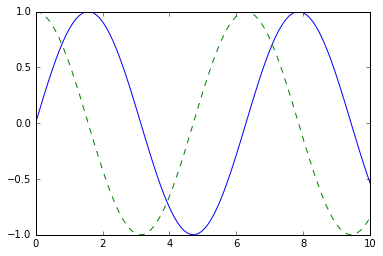

In [8]:
%matplotlib inline

import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the savefig() command. For example, to save the previous figure as a PNG file, you can run the following code.

In [9]:
fig.savefig('my_figure.png')

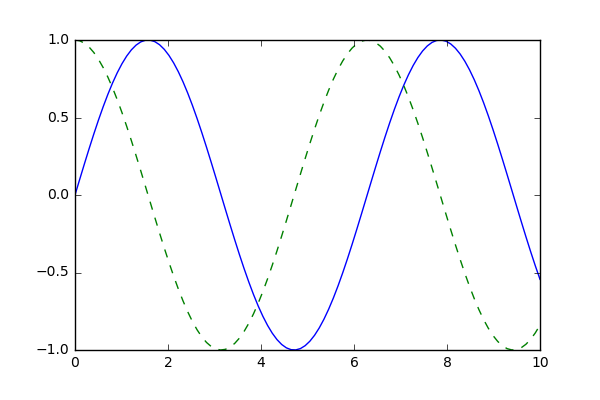

In [11]:
from IPython.display import Image
Image('my_figure.png')

### Two Interfaces for the Price of One
A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style interface

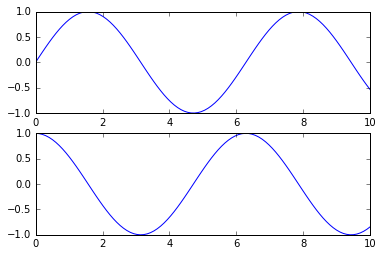

In [13]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is stateful: it keeps track of the "current" figure and axes, which are where all ```plt``` commands are applied. You can get a reference to these using the ```plt.gcf()``` (get current figure) and ```plt.gca()``` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

#### Objective-oriented interface
The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit ```Figure``` and ```Axes``` objects. To re-create the previous plot using this style of plotting, you might do the following.

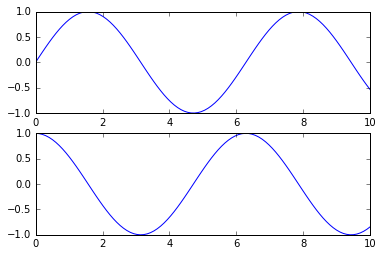

In [14]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated. Throughout this tutorial, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient. In most cases, the difference is as small as switching ```plt.plot()``` to ```ax.plot()``, but there are a few gotchas that we will highlight as they come up in the following sections.

## Simple Line Plots

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
%matplotlib notebook

For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows:

<IPython.core.display.Javascript object>


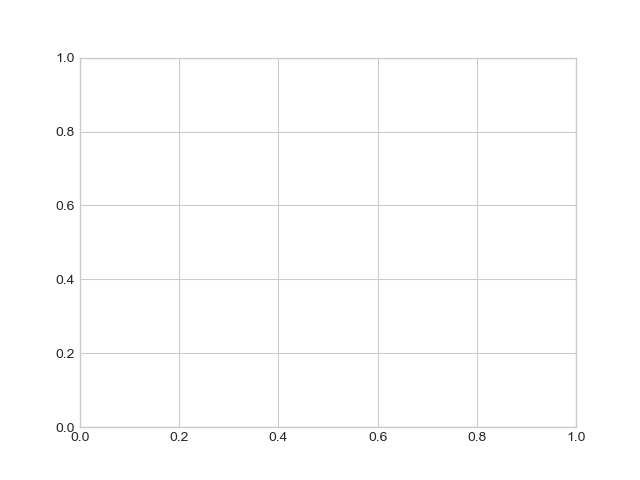

In [6]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ```plt.Figure```) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The *axes* (an instance of the class ```plt.Axes```) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. Throughout this book, we'll commonly use the variable name ```fig``` to refer to a figure instance, and ```ax``` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ```ax.plot``` function to plot some data. Let's start with a simple sinusoid:

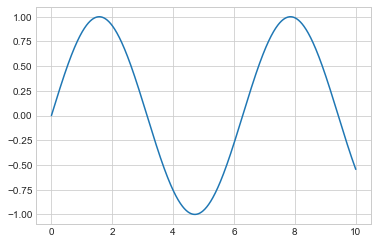

In [3]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background

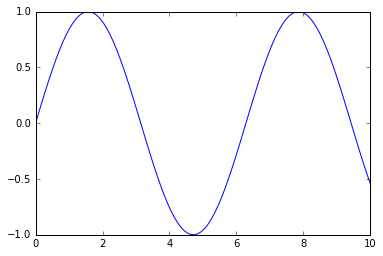

In [15]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the plot function multiple times.

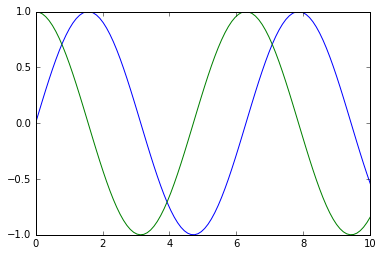

In [16]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### Adjusting the plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles. The ```plt.plot()``` function takes additional arguments that can be used to specify these. To adjust the color, you can use the ```color``` keyword, which accepts a string argument representing virtually any imaginable color. The color can be specified in a variety of ways.

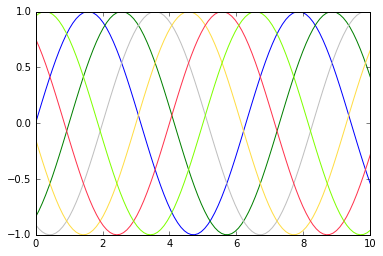

In [17]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the linestyle keyword.

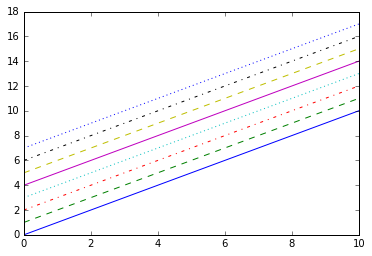

In [18]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these linestyle and color codes can be combined into a single non-keyword argument to the plt.plot() function.

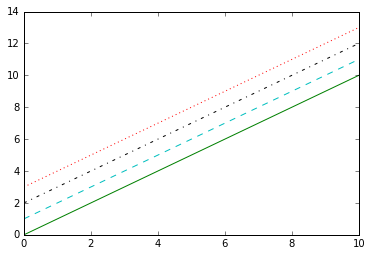

In [19]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

### Adjusting the Plot: Axes Limits
Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control. The most basic way to adjust axis limits is to use the ```plt.xlim()``` and ```plt.ylim()``` methods.

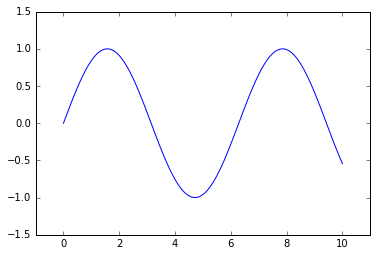

In [20]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments.

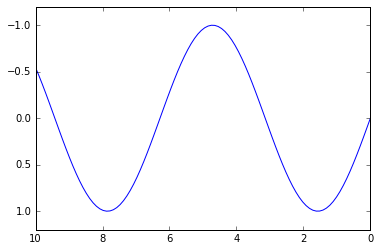

In [21]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is '''plt.axis()''' (note here the potential confusion between axes with an *e*, and axis with an *i*). The ```plt.axis()``` method allows you to set the ```x``` and ```y``` limits with a single call, by passing a list which specifies ```[xmin, xmax, ymin, ymax]```.

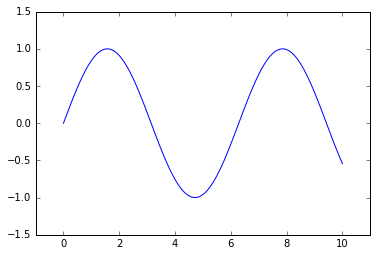

In [22]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

The ```plt.axis()``` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot.

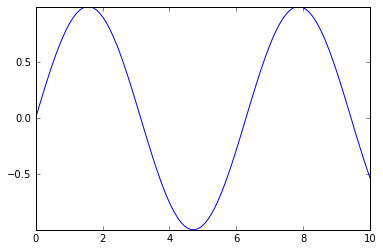

In [23]:
plt.plot(x, np.sin(x))
plt.axis('tight');

### Labeling Plots
Titles and axis labels are the simplest labels. There are methods that can be used to quickly set them. The position, size, and style of these labels can be adjusted using optional arguments to the function. For more information, see the Matplotlib documentation and the docstrings of each of these functions.

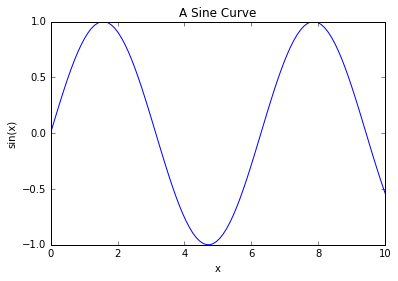

In [25]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the (you guessed it) ```plt.legend()``` method. Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ```label``` keyword of the plot function.The ```plt.legend()``` function keeps track of the line style and color, and matches these with the correct label. More information on specifying and formatting plot legends can be found in the plt.legend docstring. We'll also cover more detail in a subsequent tutorial section.

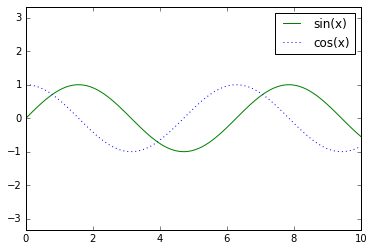

In [26]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

### Some Important Differences between ```plt``` and ```ax```
While most ```plt``` functions translate directly to ```ax``` methods (such as ```plt.plot()``` -> ```ax.plot()```, ```plt.legend()``` -> ```ax.legend()```, etc.), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:
- ```plt.xlabel()``` -> ```ax.set_xlabel()
- ```plt.ylabel()``` -> ```ax.set_ylabel()
- ```plt.xlim()``` -> ```ax.set_xlim()
- ```plt.ylim()``` -> ```ax.set_ylim()
- ```plt.title()``` -> ```ax.set_title()

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ```ax.set()``` method to set all these properties at once.

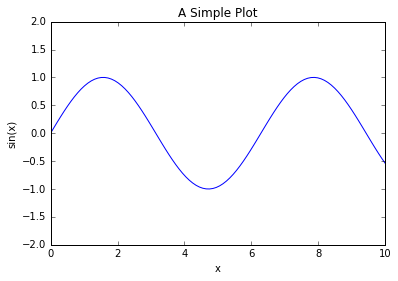

In [27]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

## Simple Scatter Plots
Another commonly used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.

The same function used to generate line plots can be used to generate scatter plots: ```plt.plot```/```ax.plot```.

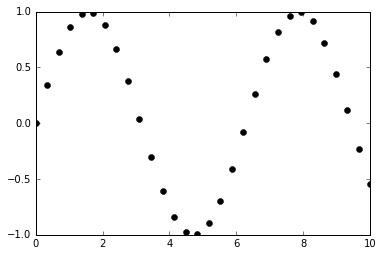

In [28]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as '-', '--' to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ```plt.plot```, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll illustrate a number of the more common ones here.

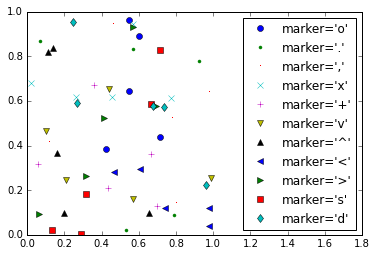

In [29]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them!

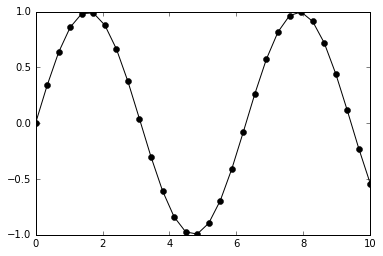

In [32]:
plt.plot(x, y, '-ok'); # the semi-colon avoids printing plot metadata codes

Additional keyword arguments to ```plt.plot``` specifiy a wide range of line and marker properties.

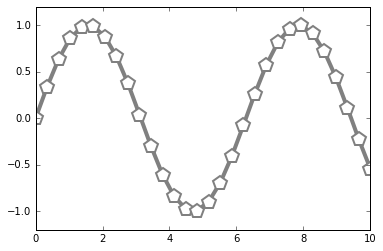

In [33]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Scatter Plots with ```plt.scatter```
A second, more powerful method of creating scatter plots is the ```plt.scatter``` function, which can be used very similarly to the ```plt.plot``` function.

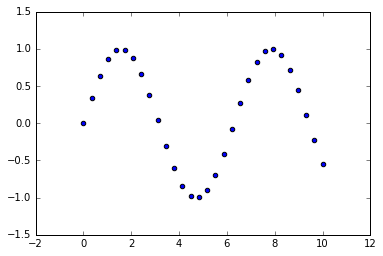

In [34]:
plt.scatter(x, y, marker='o');

The primary difference of ```plt.scatter``` from ```plt.plot``` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes. In order to better see the overlapping results, we'll also use the alpha keyword to adjust the transparency level:

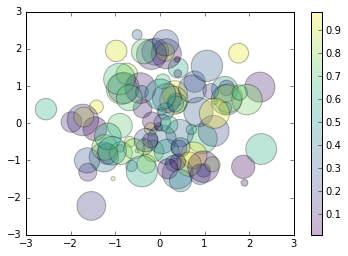

In [35]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the ```colorbar()``` command), and that the size argument is given in pixels. In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured.

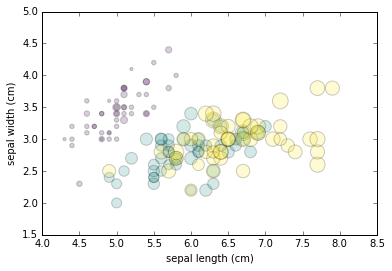

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower. Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

#### ```plot``` Versus ```scatter```: A Note on Efficiency
Aside from the different features available in ```plt.plot``` and ```plt.scatter```, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ```plt.plot``` can be noticeably more efficient than ```plt.scatter```. The reason is that ```plt.scatter``` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In ```plt.plot```, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ```plt.plot``` should be preferred over ```plt.scatter``` for large datasets.